<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Multi_Linear_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/50_Startups.csv")

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#UNIVARIATE ANALYSIS

For: R&D Spend


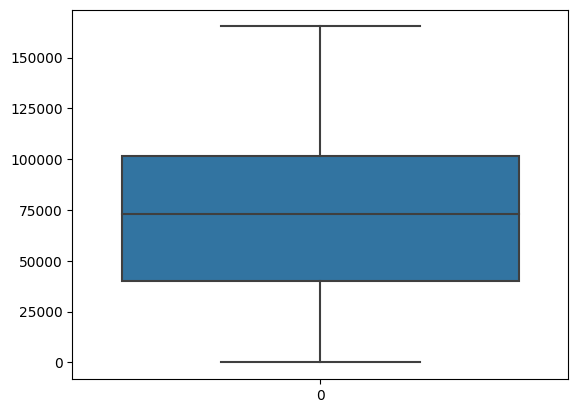

For: Administration


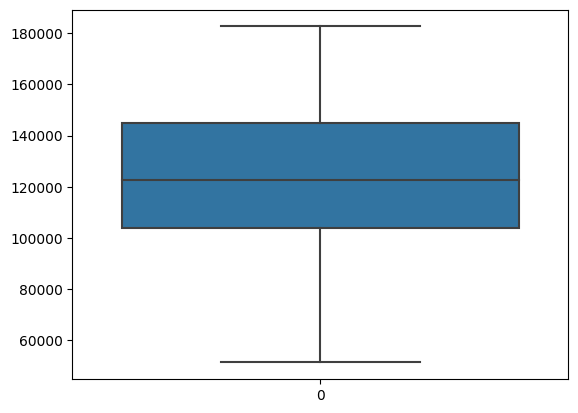

For: Marketing Spend


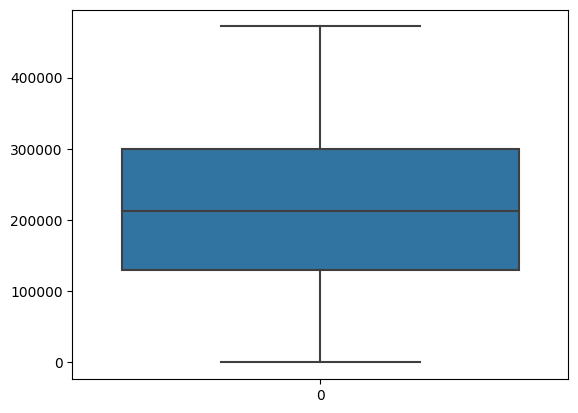

For: Profit


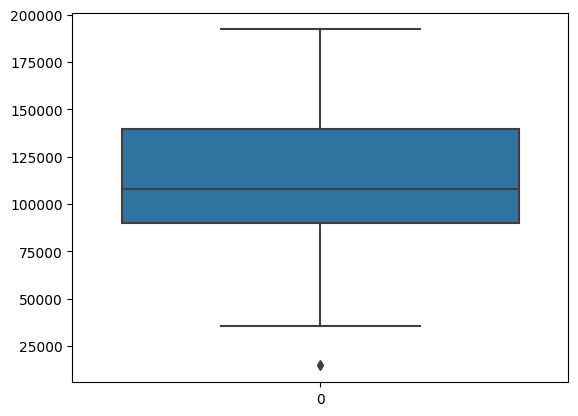

In [ ]:
for i in df.describe():
  print("For:", i)
  sns.boxplot(df[i])
  plt.show()

<Axes: ylabel='Count'>

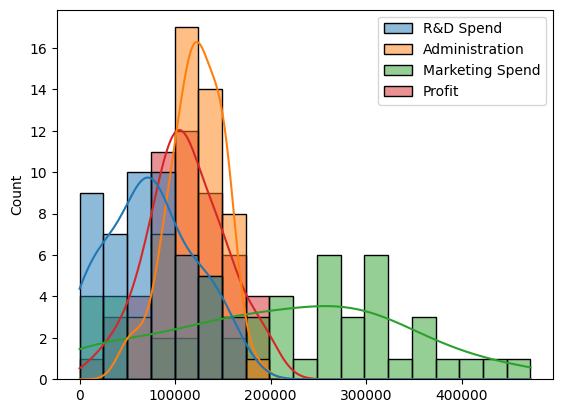

In [ ]:
sns.histplot(data=df, kde=True)

<Axes: >

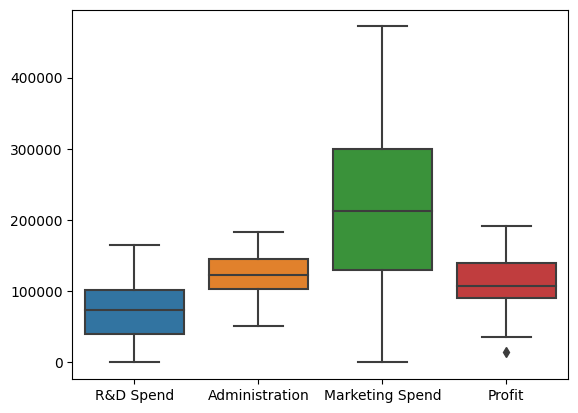

In [ ]:
sns.boxplot(data=df)

In [ ]:
Q3 = df['Profit'].quantile(q=0.75)
Q1 = df['Profit'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
up = Q3 + 1.5 * IQR
down = Q1 - 1.5*IQR

49627.07499999998


In [ ]:
down

15698.290000000023

In [ ]:
import numpy as np
def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['Profit'], down, up)
print(a)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     15698.29
Name: Profit, dtype: float64


In [ ]:
df['Profit'] = a

{'whiskers': [<matplotlib.lines.Line2D at 0x7a52e975ec20>,
 'caps': [<matplotlib.lines.Line2D at 0x7a52e975f160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a52e975e980>],
 'medians': [<matplotlib.lines.Line2D at 0x7a52e975f6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a52e975f940>],
 'means': []}

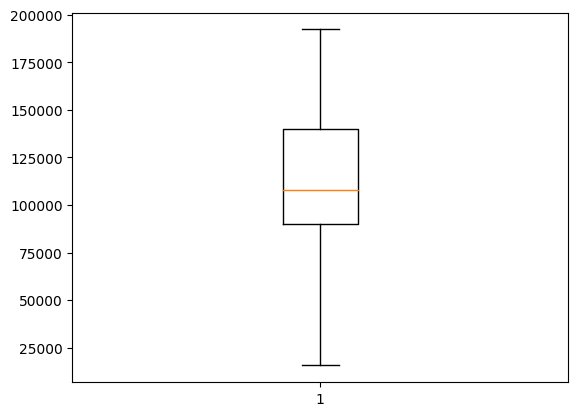

In [ ]:
plt.boxplot(df['Profit'])

#BIVARIATE ANALYSIS

In [ ]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.973278
Administration,0.241955,1.000000,-0.032154,0.200885
Marketing Spend,0.724248,-0.032154,1.000000,0.747993
Profit,0.973278,0.200885,0.747993,1.000000


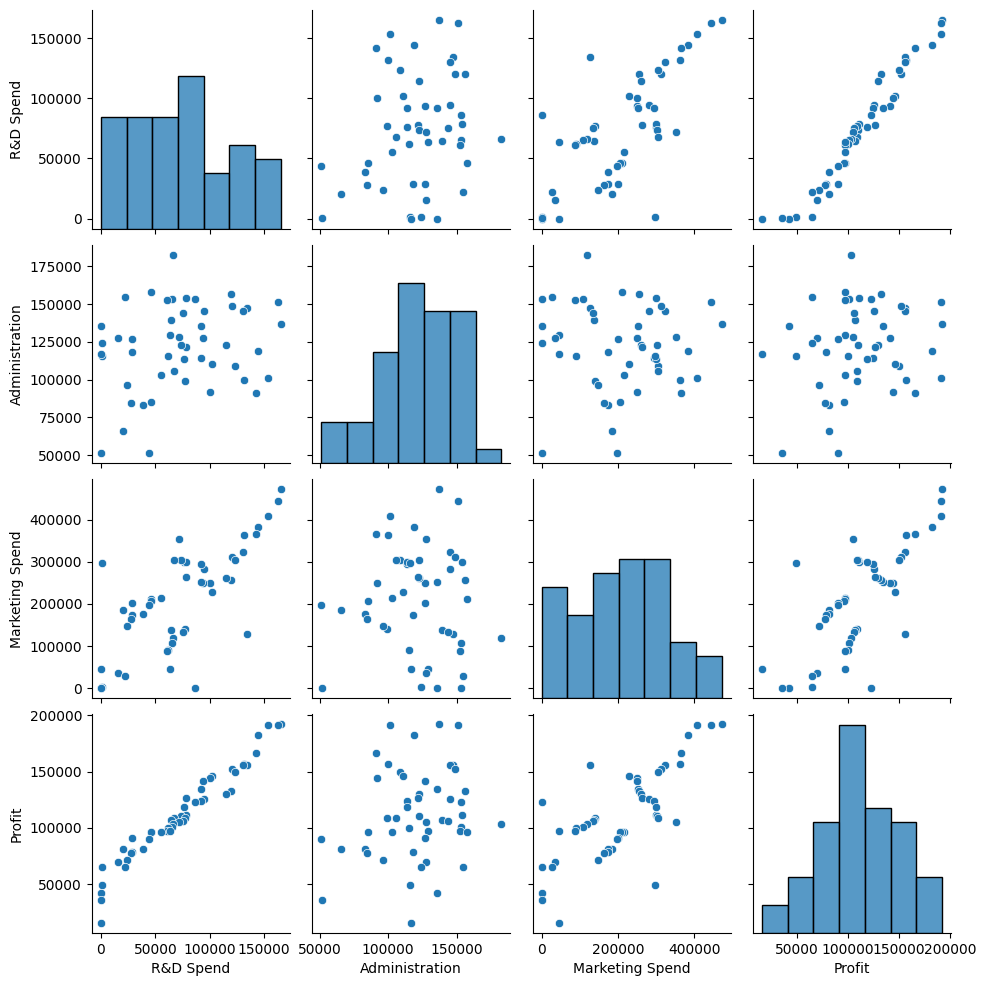

In [ ]:
sns.pairplot(df)

#LABEL ENCODING


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['State'] = label.fit_transform(df['State'])

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


#MODEL BUILDING

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Profit', axis=1)
Y = df['Profit']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.9471522740806881

In [ ]:
model.score(X_test, Y_test)

0.9532733914005522

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.9424546984434163


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
data = df[['R&D Spend','Administration','Marketing Spend','State']]
gone = pd.DataFrame()
gone['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
gone['Columns'] = data.columns


In [ ]:
gone

,VIF,Columns
0,8.386322,R&D Spend
1,4.815916,Administration
2,7.674608,Marketing Spend
3,2.382637,State


In [ ]:
#Dropping the highest VIF feature, and then checking the accuracies.
b = df.drop('R&D Spend', axis=1)

In [ ]:
X = b.drop('Profit', axis=1)
Y = b['Profit']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model1 = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.7479541667915075

In [ ]:
model.score(X_test, Y_test)

0.21122559423439669

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.7315163950636389


In [ ]:
a = df.drop('Marketing Spend', axis=1)

In [ ]:
X = b.drop('Profit', axis=1)
Y = b['Profit']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model1 = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.7479541667915075

In [ ]:
model.score(X_test, Y_test)

0.21122559423439669

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.7315163950636389


In [ ]:
#We get to know that by removing the highly correlated features, the Adjusted R-Squared value decreases drastically. Also, the train-test accuracies are also decreased.
#So, we do not remove those features, and go with the accuracies of the original model of linear regression.

In [ ]:
X = df.drop('Profit', axis=1)
Y = df['Profit']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_train, Y_train)

0.9471522740806881

In [ ]:
model.score(X_test, Y_test)

0.9532733914005522

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
r_train = r2_score(Y_train, y_pred_train)
r_test = r2_score(Y_test, y_pred_test)
print(r_train)
print(r_test)

0.9471522740806881
0.9532733914005522


In [ ]:
#But also, in case of multi-linear regression, it is always better to consider Adjusted R-squared rather than R_squared.

In [ ]:
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.9424546984434163


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [ ]:
lasso.score(X_train, Y_train)

0.9471522740692933

In [ ]:
lasso.score(X_test, Y_test)

0.9532735159485864

In [ ]:
lasso_pred_train = lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test)

In [ ]:
print(r2_score(Y_train,lasso_pred_train))
print(r2_score(Y_test,lasso_pred_test))

0.9471522740692933
0.9532735159485864


In [ ]:
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.9424546984434163


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train, Y_train)

0.9471522734486686

In [ ]:
ridge.score(X_test, Y_test)

0.9532743179022387

In [ ]:
ridge_pred_train = ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test)

In [ ]:
print(r2_score(Y_train,ridge_pred_train))
print(r2_score(Y_test,ridge_pred_test))

0.9471522734486686
0.9532743179022387


In [ ]:
results = pd.DataFrame(dtype='int', columns=[['R-squared_Train_Accuracy','R-squared_Test_Accuracy', 'Adjusted-R squared value']],
                       index=['LinearRegression', 'Lasso', 'Ridge'])

In [ ]:
ss_total = ((Y_train - Y_train.mean())**2).sum()
ss_reg = ((y_pred_train - Y_train.mean())**2).sum()
r_squared = ss_reg / ss_total

# Get the number of observations and the number of independent variables
n_obs = len(X)
n_vars = len(X.columns)

# Calculate the adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n_obs - 1) / (n_obs - n_vars - 1)

# Print the adjusted R-squared
print("Adjusted R-squared:", adjusted_r_squared)

Adjusted R-squared: 0.9424546984434163


In [ ]:
results

,R-squared_Train_Accuracy,R-squared_Test_Accuracy,Adjusted-R squared value
LinearRegression,NaN,NaN,NaN
Lasso,NaN,NaN,NaN
Ridge,NaN,NaN,NaN


In [ ]:
results['R-squared_Train_Accuracy'] = ['0.9471522740806881','0.9471522740692933','0.9471522734486686']
results['R-squared_Test_Accuracy'] = ['0.9532733914005522','0.9532735159485864','0.9532743179022387']
results['Adjusted-R squared value'] = ['0.9424546984434163','0.9424546984434163', '0.9424546984434163']

In [ ]:
results = results.iloc[:,:3]

In [ ]:
results

,R-squared_Train_Accuracy,R-squared_Test_Accuracy,Adjusted-R squared value
LinearRegression,0.9471522740806881,0.9532733914005522,0.9424546984434163
Lasso,0.9471522740692933,0.9532735159485864,0.9424546984434163
Ridge,0.9471522734486686,0.9532743179022387,0.9424546984434163


In [ ]:
#Looking at the R-sqaured scores for all, it is clear that Ridge model can work well for this data.